# Chapter 11 : Fundamentals of Estimation


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Helper functions imported from textbook
def p_rtail(sampdist,tstat): 
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = x > tstat, color='r') 
    plt.fill_between(x,y, where = x <= tstat, color='g') 
    plt.show() 
    pvalue = np.sum(sampdist < tstat) / len(sampdist) 
    return pvalue 

def p_ltail(sampdist,tstat): 
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = x < tstat, color='r') 
    plt.fill_between(x,y, where = x >= tstat, color='g') 
    plt.show() 
    pvalue = np.sum(sampdist > tstat) / len(sampdist) 

    return pvalue 

def p_2tail(sampdist,tstat):
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() 
    hyp = np.mean(sampdist) 
    cutoff1 = hyp - np.abs(hyp - tstat) 
    cutoff2 = hyp + np.abs(hyp - tstat) 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = (x < cutoff1) | (x > cutoff2), color='r') 
    plt.fill_between(x,y, where = (x >= cutoff1) & (x <= cutoff2), color='g') 
    plt.show() 
    pvalue = np.sum((sampdist < cutoff1) | (sampdist > cutoff2)) / len(sampdist) 
    return pvalue 

In [3]:
#diabetes csv imported into the directory.
diabetes = pd.read_csv("diabetes.csv")
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1. Assuming that the variable Pregnancies follows a Poisson distribution, obtain the maximum likelihood estimate of the mean of the distribution.  

In [4]:
#mean
print(diabetes.Pregnancies.mean())
print(type(diabetes.Pregnancies))
print(diabetes.shape)

3.8450520833333335
<class 'pandas.core.series.Series'>
(768, 9)


In [5]:
from scipy.stats import poisson
x= diabetes.Pregnancies.sample(n=200).to_numpy()
#print(x)
lam = 4

#since there is no decimal pregnancies, we will round it up to 4

p = poisson.pmf(k = x, mu = lam) 

L = np.prod(p) 

print(L) 

2.833267093210059e-251


2. What is the 95% confidence interval for the parameter? 

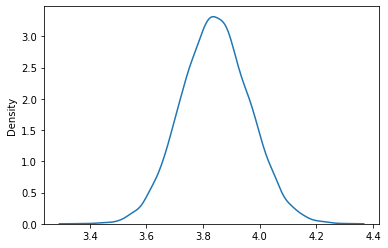

In [6]:
np.random.seed(987654321) 

paramdist = [diabetes['Pregnancies'].sample(n=len(diabetes), replace=True).mean() for _ in range(10000)]
sns.kdeplot(paramdist) 

plt.show() 

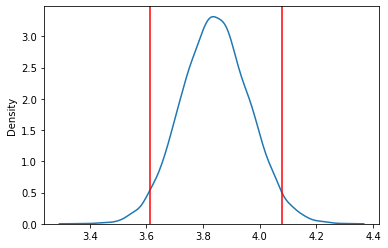

95% Confidence Interval = [3.61, 4.08]


In [7]:
q1 = np.percentile(paramdist, 0.05/2 * 100) 

q2 = np.percentile(paramdist, (1-(0.05/2)) * 100) 

sns.kdeplot(paramdist) 

plt.axvline(q1, color='r', linestyle='-') 

plt.axvline(q2, color='r', linestyle='-') 

plt.show() 

print("95% Confidence Interval = [{:.2f}, {:.2f}]".format(q1,q2)) 

3. Assuming that the variable BMI follows a normal distribution, obtain the maximum likelihood estimate of the mean and the standard deviation.  

In [8]:
x= diabetes.BMI.sample(n=200).to_numpy()
#print(x)
lam = round(diabetes.BMI.std())
print(lam)

#since there is no decimal pregnancies, we will round it up to 4

p = poisson.pmf(k = x, mu = lam) 

L = np.prod(p) 

print(L) 

8
0.0


In [9]:
diabetes.BMI.std()

7.8841603203754405

In [10]:
x= diabetes.BMI.sample(n=100).to_numpy()
#print(x)
lam = round(diabetes.BMI.mean())
print(lam)

#since there is no decimal pregnancies, we will round it up to 4

p = poisson.pmf(k = x, mu = lam) 

L = np.prod(p) 

print(L) 

32
0.0


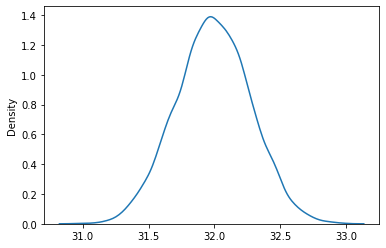

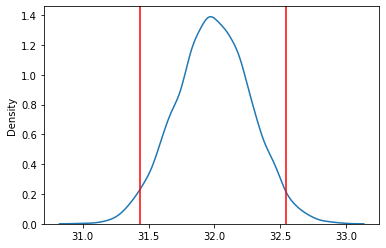

95% Confidence Interval = [31.44, 32.54]


In [11]:
np.random.seed(987654321) 

paramdist = [diabetes['BMI'].sample(n=len(diabetes), replace=True).mean() for _ in range(10000)]
sns.kdeplot(paramdist) 

plt.show() 

q1 = np.percentile(paramdist, 0.05/2 * 100) 

q2 = np.percentile(paramdist, (1-(0.05/2)) * 100) 

sns.kdeplot(paramdist) 

plt.axvline(q1, color='r', linestyle='-') 

plt.axvline(q2, color='r', linestyle='-') 

plt.show() 

print("95% Confidence Interval = [{:.2f}, {:.2f}]".format(q1,q2)) 

5. Using the maximum likelihood approach estimate the population parameter for the binary variable Outcome.   

In [12]:
import scipy

def LLbinary(pi): 
    p = np.where(diabetes.Outcome == 1, pi, 1 - pi) 
    LL = np.sum(np.log(p)) 
    return(-1*LL) 

constraint = ({'type': 'eq', 'fun': lambda x: x[0]+(1-x[0])}) 

res1 = scipy.optimize.minimize(LLbinary, x0 = .5, constraints=constraint, method='Nelder-Mead') 

print(res1) 

 final_simplex: (array([[0.34892578],
       [0.34902344]]), array([496.74195686, 496.74196223]))
           fun: 496.7419568605032
       message: 'Optimization terminated successfully.'
          nfev: 26
           nit: 13
        status: 0
       success: True
             x: array([0.34892578])


C:\Users\jwyan\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:535: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,
